In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("Sales_data_zone_wise.csv")

In [35]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [36]:
#checking for null values
df.isna().sum().sum()

0

In [37]:
# to see the column names
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [38]:
# to check the datatype of each column
df.dtypes

Month       object
Zone - A     int64
Zone - B     int64
Zone - C     int64
Zone - D     int64
dtype: object

# 1.The mean sales generated by each zone.

In [39]:
dm=df.describe(include='all').loc['mean']
dm=pd.DataFrame(dm)
print("\nMean sales generated by each zone:")
dm=dm.reset_index().drop(0)
dm.rename(columns={"index":"Zone","mean":"Mean"})


Mean sales generated by each zone:


,Zone,Mean
1,Zone - A,1540493.137931
2,Zone - B,1755559.586207
3,Zone - C,1772871.034483
4,Zone - D,1842926.758621


# 2.Total sales generated by all the zones for each month.

In [40]:
# Showing first 5 months total Sales
df_tot=df.copy()
df_tot["Total_sales"]=df_tot["Zone - A"]+df_tot["Zone - B"]+df_tot["Zone - C"]+df_tot["Zone - D"]
df_tot[["Month","Total_sales"]].head()

,Month,Total_sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328


# 3.Check whether all the zones generate the same amount of sales

Text(0.5, 1.0, 'Distribution of sales per Zone\n')

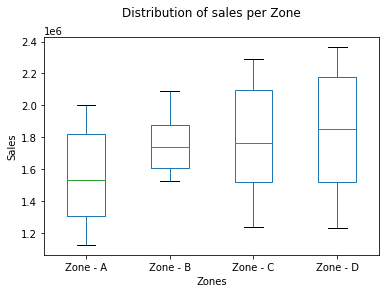

In [41]:
#using boxplot to see the data distribution within each zone
df.boxplot(grid=False)
plt.xlabel("Zones")
plt.ylabel("Sales")
plt.title("Distribution of sales per Zone\n")

Insight:
1. There is no outliers
2. based on the above graph, we cn see that sales in Zone B is more consistant

ANOVA TEST

In [42]:
#Defining Hypothesis
# H0=There is no significant difference in variance for sales in Zones A,B,C & D
# Ha=Means are not all equal

In [43]:
#importing library for Anova Test
import scipy.stats as stats

In [54]:
los=0.05
a=np.array(df["Zone - A"])
b=np.array(df["Zone - B"])
c=np.array(df["Zone - C"])
d=np.array(df["Zone - D"])

fvalue,pvalue=stats.f_oneway(a,b,c,d)
print("Level of Significance = ",str(los))
print("Fvalue = ",str(fvalue))
print("Pvalue = ",str(pvalue))

Level of Significance =  0.05
Fvalue =  5.672056106843581
Pvalue =  0.0011827601694503335


In [55]:
if pvalue<los:
    print("Reject Null Hypothesis")
else:
    print("Failing to REject null Hypothesis")

Reject Null Hypothesis


In [53]:
#Conclusion:
    # Based on the testing carried out in the provided data, we are rejecting null hypothesis 
    # We can conclude that There is an atleast one zone has a different mean